In [1]:
import pandas as pd
import seaborn as sns   #for visualisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os
from collections import Counter

# Importing the data

In [2]:
df=pd.read_csv('Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print ("\nFeatures : \n" ,df.columns)


Features : 
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We observe that there are no Null values in any column.

In [6]:
df.shape  #It is to be observed that there are 21 columns and 7042 rows.

(7043, 21)

# Data Manipulation

In [7]:
print ("\nUnique values for each column:\n",df.nunique())


Unique values for each column:
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In the output above, it is to be noted that for different columns there exists a set of unique values. 
It is easy to interpret looking at customerID column that each value must be unique and hence there are 7043 values
(same as the total number of rows) and for gender(here considering binary only) there exists 2 unique values; 
either male or female.

In [8]:
df.drop(["customerID"],axis=1,inplace = True) #dropping CustomerID column because it has no contribution in analysis of Churn

In [9]:
df['gender']=df['gender'].map({'Male':1,'Female':0})#mapping male to 1 and female to 0

In [10]:
change_to_num = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for x in change_to_num:
    df[x] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df[x]]


df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [11]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Data Visualization

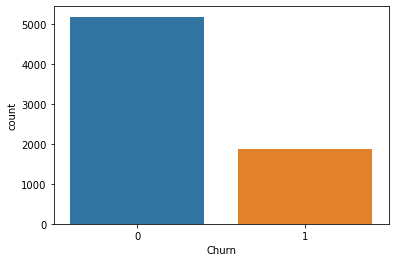

In [12]:
sns.countplot(x="Churn",data=df) #Visualising the distribution of Churn values

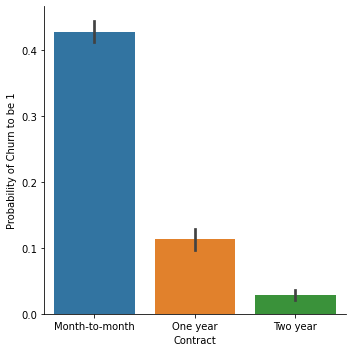

In [13]:
v=sns.catplot(x="Contract", y="Churn", data=df,kind="bar")
v.set_ylabels("Probability of Churn to be 1")
# All types of contract vs Churning probability

OBSERVATIONS:

1.Customers are more likely to stop using service when the contract is month to month.

2.Least when a two year contract is made.

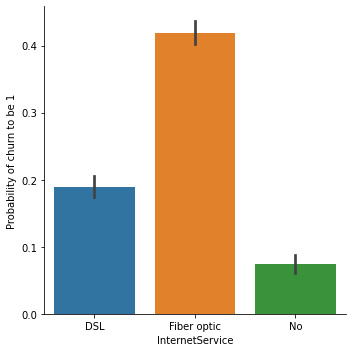

In [14]:
u=sns.catplot(x="InternetService", y="Churn", data=df,kind="bar")
u.set_ylabels("Probability of churn to be 1")
#All types of IS vs CHurn probability

OBSERVATIONS:

1.Maximum probability of losing a customer is when they are using Fiber optic IS

2.Lowest is when they're using none

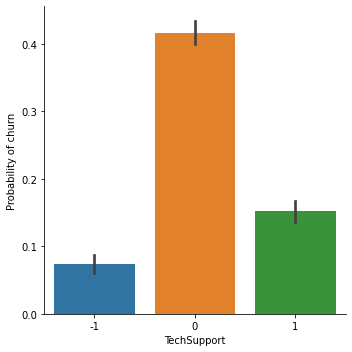

In [15]:
u=sns.catplot(x="TechSupport", y="Churn", data=df,kind="bar")
u.set_ylabels("Probability of churn")

Observation: In case of no tech support, customers have high probability to churn

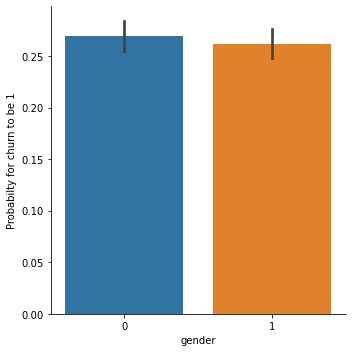

In [16]:
u=sns.catplot(x="gender", y="Churn", data=df,kind="bar")
u.set_ylabels("Probabilty for churn to be 1")

Observation: Gender doesn't play a significant role in analysing whether a customer would churn

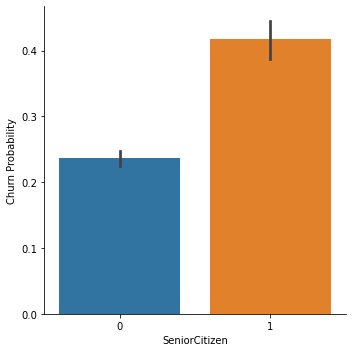

In [17]:
u=sns.catplot(x="SeniorCitizen", y="Churn", data=df,kind="bar")
u.set_ylabels("Churn Probability")

Observation: Younger people are likely to turn into Churn

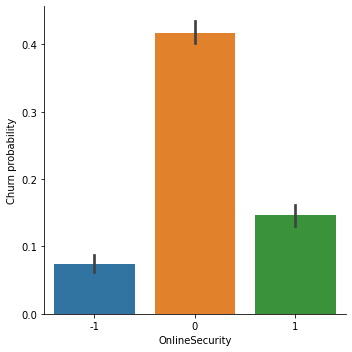

In [18]:
u=sns.catplot(x="OnlineSecurity", y="Churn", data=df,kind="bar")
u.set_ylabels("Churn probability")

Observation: Online security is directly proportional to churn probability

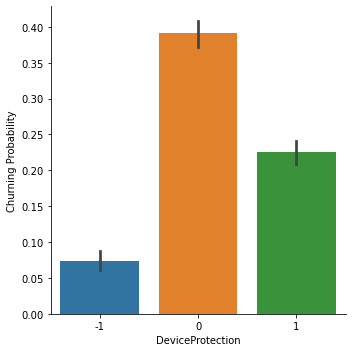

In [19]:
u=sns.catplot(x="DeviceProtection", y="Churn", data=df,kind="bar")
u.set_ylabels("Churning Probability")

Observation: Less device protection may lead to more churning

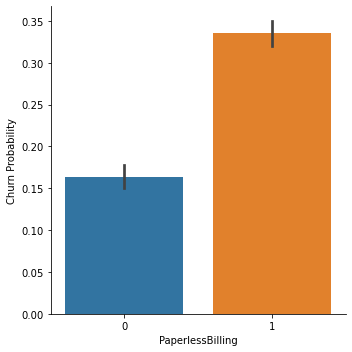

In [20]:
u=sns.catplot(x="PaperlessBilling", y="Churn", data=df,kind="bar")
u.set_ylabels("Churn Probability")

Conclusion: The above charts helped in analysing how these features affect Pobability of Churning.

Gender Feature had little impact as women were very less likely to churn


In [21]:
#Now we will map the remaining columns (InternetService, Contract, PaymentMethod)

In [22]:
df = pd.get_dummies(data=df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,0,1,0,1,0,-1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,2,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,45,0,-1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting into train and test dataframes

In [23]:
y = df['Churn'].values
X = df.drop(columns = ['Churn'])

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)

# Implementing Machine Learning Models

In [25]:
np.random.seed(1)
from sklearn.tree import DecisionTreeClassifier         #Decision Tree
model_dt= DecisionTreeClassifier(splitter='best')
model_dt.fit(x_train,y_train)
prediction=model_dt.predict(x_test)
print("Accuracy using Decision Tree: {0:.2%}".format(accuracy_score(prediction,y_test)))

Accuracy using Decision Tree: 77.08%


In [26]:
np.random.seed(1)
from sklearn.svm import SVC                             #SVM
model_svc = SVC()
model_svc.fit(x_train,y_train)
prediction=model_svc.predict(x_test)
print("Accuracy using SVM: {0:.2%}".format(accuracy_score(prediction,y_test)))

Accuracy using SVM: 80.27%


In [27]:
np.random.seed(1)
from sklearn.naive_bayes import GaussianNB              #Naive Bayes
model_nb = GaussianNB(var_smoothing=1e-7)
model_nb.fit(x_train,y_train)
prediction=model_nb.predict(x_test)
print("Accuracy using Naive Bayes: {0:.2%}".format(accuracy_score(prediction,y_test)))

Accuracy using Naive Bayes: 28.03%


In [28]:
np.random.seed(1)
from sklearn.linear_model import LogisticRegression    #Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
prediction=model_lr.predict(x_test)
print("Accuracy using Logistic Regression: {0:.2%}".format(accuracy_score(prediction,y_test)))

Accuracy using Logistic Regression: 81.97%


In [29]:
np.random.seed(1)
from sklearn.neighbors import KNeighborsClassifier    #K-Nearest Neighbor
model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(x_train,y_train)
prediction=model_knn.predict(x_test)
print("Accuracy using KNN: {0:.2%}".format(accuracy_score(prediction,y_test)))

Accuracy using KNN: 79.35%


In [30]:
np.random.seed(1)
from sklearn.ensemble import RandomForestClassifier     #Random Forest
model_rf = RandomForestClassifier(n_estimators = 35)
model_rf.fit(x_train,y_train)
prediction=model_rf.predict(x_test)
print("Accuracy using Random Forest: {0:.2%}".format(accuracy_score(prediction,y_test)))

Accuracy using Random Forest: 80.34%


In [32]:
np.random.seed(1)
from sklearn.ensemble import AdaBoostClassifier                   #AdaBoost Tree
model_adb = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model_adb.fit(x_train,y_train)
prediction=model_adb.predict(x_test)
print("Accuracy using AdaBoost Tree: {0:.2%}".format(accuracy_score(prediction,y_test)))

Accuracy using AdaBoost Tree: 80.70%


# Model Evaluation

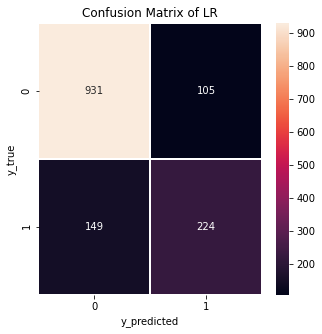

In [33]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
cm_lr = confusion_matrix(y_test,model_lr.predict(x_test)) #for Logistic Regression
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "blue", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of LR")
plt.show()

In [34]:
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [35]:
print_scores("Logistic Regression:",y_test, model_lr.predict(x_test))
print_scores("SVM:",y_test, model_svc.predict(x_test))
print_scores("KNN:",y_test, model_knn.predict(x_test))
print_scores("Naive Bayes:",y_test, model_nb.predict(x_test))
print_scores("Decision Tree:",y_test, model_dt.predict(x_test))
print_scores("Random Forest:",y_test, model_rf.predict(x_test))
print_scores("AdaBoost Tree:",y_test, model_adb.predict(x_test))

Logistic Regression:
accuracy:  0.8197303051809794
precision:  0.6808510638297872
recall:  0.6005361930294906
f1_score:  0.8159550871525338
SVM:
accuracy:  0.8026969481902059
precision:  0.7111111111111111
recall:  0.4289544235924933
f1_score:  0.784858288767938
KNN:
accuracy:  0.7934705464868701
precision:  0.6339869281045751
recall:  0.5201072386058981
f1_score:  0.7865155150100557
Naive Bayes:
accuracy:  0.2803406671398155
precision:  0.2588412340105342
recall:  0.9222520107238605
f1_score:  0.1742129740142913
Decision Tree:
accuracy:  0.7707594038325053
precision:  0.5827814569536424
recall:  0.4718498659517426
f1_score:  0.7625005459291349
Random Forest:
accuracy:  0.8034066713981547
precision:  0.6726618705035972
recall:  0.5013404825737265
f1_score:  0.7933715718050975
AdaBoost Tree:
accuracy:  0.8069552874378992
precision:  0.662379421221865
recall:  0.5522788203753352
f1_score:  0.8010104896021994


In [36]:
report = classification_report(y_test, model_lr.predict(x_test))  #Report of best performing LR model
print(report)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



# Final Conclusions:



Tenure is inversely proportional to Churn

Monthly charges is directly proportional to Churn

The RF model performed best when number of trees=35

The KNN model performed the best when k=15

Logistic Regression model gave highest accuracy

Naive Bayes Performed the worst